Error: No quedan datos después de aplicar el filtro de atípicos.
Usando todos los datos originales en lugar de filtrar atípicos.


c:\Users\monts\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\monts\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\monts\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\monts\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

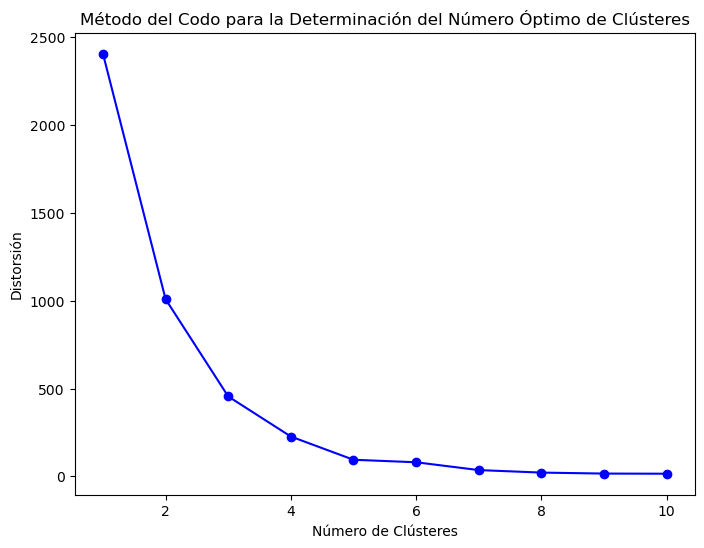

c:\Users\monts\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\monts\AppData\Local\Temp\ipykernel_15988\4133842167.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", k)


Silhouette Score: 0.726


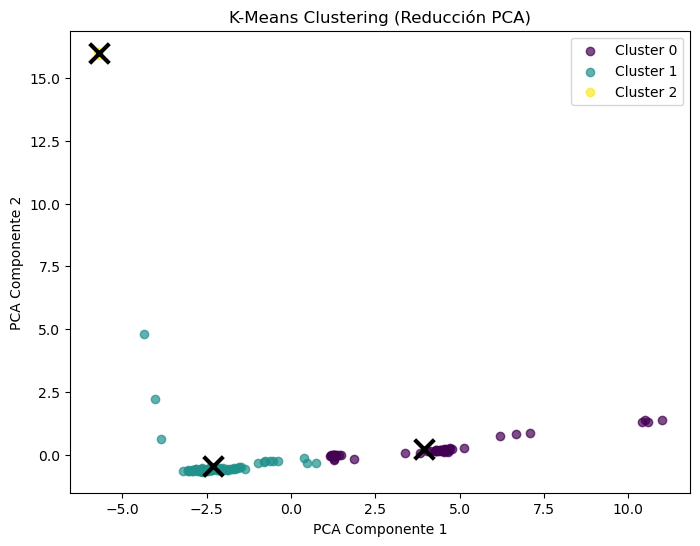

              precision    recall  f1-score   support

          R5       0.57      0.92      0.71        13
        R5X4       0.00      0.00      0.00         7
          X4       0.50      0.40      0.44        10

    accuracy                           0.53        30
   macro avg       0.36      0.44      0.38        30
weighted avg       0.41      0.53      0.45        30



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import os

# Cargar el dataset
df = pd.read_excel("C:/Users/monts/OneDrive/Escritorio/UAA/Inteligencia Artificial/VIH/dataset_VIH.xlsx")

# Manejo de valores nulos
df.fillna(0, inplace=True)

# Selección de características (excluir columnas irrelevantes)
features = df.drop(columns=["aminoacido", "clase", "sumatoria"]).columns
data = df[features].values

# Normalización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Filtrar datos atípicos: eliminar valores fuera de 3 desviaciones estándar
mean = np.mean(data_scaled, axis=0)
std_dev = np.std(data_scaled, axis=0)
filtered_data = data_scaled[np.all(np.abs(data_scaled - mean) < 3 * std_dev, axis=1)]

# Verificar si el filtrado eliminó todos los puntos
if filtered_data.shape[0] == 0:
    print("Error: No quedan datos después de aplicar el filtro de atípicos.")
    # Relajar aún más el filtro (usar todo el dataset)
    filtered_data = data_scaled
    print("Usando todos los datos originales en lugar de filtrar atípicos.")

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(filtered_data)

# Determinación del número óptimo de clústeres usando el Método del Codo
def elbow_method(data, max_k):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k+1), distortions, 'bo-')
    plt.xlabel('Número de Clústeres')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo para la Determinación del Número Óptimo de Clústeres')
    plt.show()

# Visualización del Método del Codo
elbow_method(data_pca, 10)

# **Inicio del Aprendizaje No Supervisado**
# Aplicar K-Means con el número óptimo de clústeres determinado por el método del codo
k = 3  # Ajusta según el resultado del método del codo
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_pca)
cluster_labels = kmeans.labels_

# Calcular Silhouette Score
silhouette = silhouette_score(data_pca, cluster_labels)
print(f"Silhouette Score: {silhouette:.3f}")

# Visualización de los clústeres
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap("viridis", k)

for i in range(k):
    cluster_points = data_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}", color=colors(i), alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], color="black", marker='x', s=200, linewidths=3)

plt.title("K-Means Clustering (Reducción PCA)")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.legend()
plt.show()
# **Fin del Aprendizaje No Supervisado**

# **Inicio del Aprendizaje Supervisado**
# Preparación de datos para Aprendizaje Supervisado
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_scaled
y = df['clase'].values  # Asegúrate de tener la columna de clase con las etiquetas correctas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluar el desempeño del modelo
print(classification_report(y_test, y_pred))
# **Fin del Aprendizaje Supervisado**
